In [471]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

In [472]:
# read the dataset

df = pd.read_csv('../data_source/used_cars.csv')
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [473]:
df.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

In [474]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [475]:
df.columns.value_counts()

brand           1
model           1
model_year      1
milage          1
fuel_type       1
engine          1
transmission    1
ext_col         1
int_col         1
accident        1
clean_title     1
price           1
Name: count, dtype: int64

In [476]:
df.shape

(4009, 12)

In [477]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand,4009,57,Ford,386,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model,4009,1898,M3 Base,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_year,4009.0,NaN,NaN,NaN,2015.51559,6.104816,1974.0,2012.0,2017.0,2020.0,2024.0
milage,4009,2818,"110,000 mi.",16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fuel_type,3839,7,Gasoline,3309,NaN,NaN,NaN,NaN,NaN,NaN,NaN
engine,4009,1146,2.0L I4 16V GDI DOHC Turbo,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transmission,4009,62,A/T,1037,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ext_col,4009,319,Black,905,NaN,NaN,NaN,NaN,NaN,NaN,NaN
int_col,4009,156,Black,2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accident,3896,2,None reported,2910,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [478]:
df.isnull().sum()

brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64

In [479]:
df.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

In [480]:
df['accident'].value_counts()

accident
None reported                             2910
At least 1 accident or damage reported     986
Name: count, dtype: int64

There are 170 missing values for fuel_type and 113 missing values for accident .
1. So for accident we have these unique keys and their values for accident -
     all the 113 empty values in accident has a new category now - No Information"
2. for 

In [481]:
df['accident'] = df['accident'].fillna('No information')
df['accident'].value_counts()

accident
None reported                             2910
At least 1 accident or damage reported     986
No information                             113
Name: count, dtype: int64

In [482]:
df['fuel_type'].value_counts()

fuel_type
Gasoline          3309
Hybrid             194
E85 Flex Fuel      139
Diesel             116
–                   45
Plug-In Hybrid      34
not supported        2
Name: count, dtype: int64

In [483]:
df['fuel_type'] = df['fuel_type'].fillna('Unknown Fuel Type')
df['fuel_type'].value_counts()

fuel_type
Gasoline             3309
Hybrid                194
Unknown Fuel Type     170
E85 Flex Fuel         139
Diesel                116
–                      45
Plug-In Hybrid         34
not supported           2
Name: count, dtype: int64

In [484]:
# after handling missing values in fuel type we unify the weird/different categories
df['fuel_type'] = df['fuel_type'].replace('–', 'Unknown Fuel Type')
df['fuel_type'] = df['fuel_type'].replace('not supported', 'Other')
df['fuel_type'].value_counts()


# ✔ 3. Show ALL rows containing a certain value
# df[df['fuel_type'] == '–']

# ✔ 4. Show random samples from the column
# df['fuel_type'].sample(10)

# ✔ 5. Show unique values with length (to detect spaces or Unicode)
# df['fuel_type'].apply(lambda x: (x, len(x))).unique()
# This helps detect hidden characters like:
# 1.trailing spaces
# 2.Unicode characters
# 3. dashes of different types

fuel_type
Gasoline             3309
Unknown Fuel Type     215
Hybrid                194
E85 Flex Fuel         139
Diesel                116
Plug-In Hybrid         34
Other                   2
Name: count, dtype: int64

Rechecking 
1. if still there are any missing values now after fixing for fuel_type & accident
2. if clean_title column has been dropped or not

In [485]:
print("dataset updated columns -----\n",df.columns)
print("\nchecking missing values after updating accident & fuel_type columns -----\n",df.isnull().sum())

dataset updated columns -----
 Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

checking missing values after updating accident & fuel_type columns -----
 brand             0
model             0
model_year        0
milage            0
fuel_type         0
engine            0
transmission      0
ext_col           0
int_col           0
accident          0
clean_title     596
price             0
dtype: int64


Text preprocessing for converting categorical(string) cols to numeric cols

In [486]:
df['price'] = df['price'].str.replace('[\$,]', '', regex=True).astype(float)

In [487]:
df['milage'] = df['milage'].str.replace(',','').str.replace('mi.', '', regex=False).astype(float)

In [488]:
df['engine_num'] = df['engine'].str.extract(r'(\d\.\d)').astype(float)


In [489]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         4009 non-null   object 
 1   model         4009 non-null   object 
 2   model_year    4009 non-null   int64  
 3   milage        4009 non-null   float64
 4   fuel_type     4009 non-null   object 
 5   engine        4009 non-null   object 
 6   transmission  4009 non-null   object 
 7   ext_col       4009 non-null   object 
 8   int_col       4009 non-null   object 
 9   accident      4009 non-null   object 
 10  clean_title   3413 non-null   object 
 11  price         4009 non-null   float64
 12  engine_num    3906 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 407.3+ KB


In [490]:
df['fuel_type'].unique()

array(['E85 Flex Fuel', 'Gasoline', 'Hybrid', 'Unknown Fuel Type',
       'Diesel', 'Plug-In Hybrid', 'Other'], dtype=object)

In [491]:
# df['accident'].value_counts()

# Now make a binary flag:
df['accident_flag'] = df['accident'].apply(lambda x:0 if x == "None reported" else 1)

In [492]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,engine_num,accident_flag
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300.0,0.0,1
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.0,3.8,1
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,54598.0,3.5,0
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500.0,4.0,0
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,34999.0,2.0,0


In [493]:
df.isnull().sum()

brand              0
model              0
model_year         0
milage             0
fuel_type          0
engine             0
transmission       0
ext_col            0
int_col            0
accident           0
clean_title      596
price              0
engine_num       103
accident_flag      0
dtype: int64

In [494]:
# handling the missing value in engine_num column
# fill the missing values with median value of the column engine_num
df['engine_num'] = df['engine_num'].fillna(df['engine_num'].median())
print("Number of missing values --->", df['engine_num'].isnull().sum())

Number of missing values ---> 0


In [495]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          4009 non-null   object 
 1   model          4009 non-null   object 
 2   model_year     4009 non-null   int64  
 3   milage         4009 non-null   float64
 4   fuel_type      4009 non-null   object 
 5   engine         4009 non-null   object 
 6   transmission   4009 non-null   object 
 7   ext_col        4009 non-null   object 
 8   int_col        4009 non-null   object 
 9   accident       4009 non-null   object 
 10  clean_title    3413 non-null   object 
 11  price          4009 non-null   float64
 12  engine_num     4009 non-null   float64
 13  accident_flag  4009 non-null   int64  
dtypes: float64(3), int64(2), object(9)
memory usage: 438.6+ KB


# Observation - 
1. Data is clean now with 0 missing values for all the columns
2. column clean_title - removed

# Step 3: Univariate EDA - understanding one column at a time, individually.
1. Identifying numeric features & categorical features 
2. Numeric Features - price, mileage_num, engine_num, model_year, car_age
3. Categorical Features - brand, fuel_type, transmission, accident, ext_col, int_col

## Understanding the price ---> Target Column

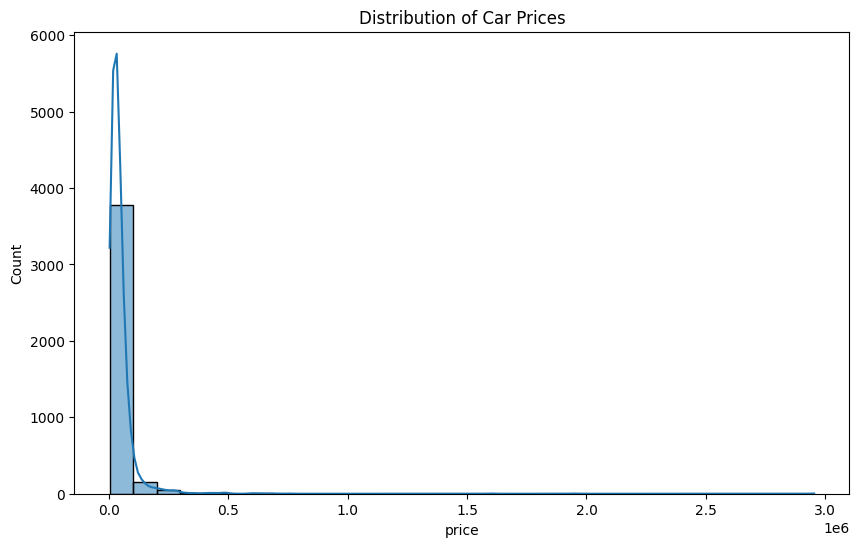

In [496]:
# distribution plot for price column
plt.figure(figsize=(10,6))
sns.histplot(df['price'], kde=True, bins =30)
plt.title('Distribution of Car Prices')
plt.show()

# inferences:
# 1. The distribution of car prices is right-skewed, indicating that most cars are priced lower, with a few high-priced outliers.
# 2. The peak of the distribution suggests that a significant number of cars are priced around $15,000 to $20,000.
# 3. The presence of a long tail on the right side indicates that there are some expensive cars in the dataset, but they are relatively rare.
# 4. The KDE curve helps visualize the overall trend of car prices, showing a gradual decline in frequency as prices increase.
# 5. This information can be useful for understanding the market dynamics and for making pricing decisions in the used car market. 
# 6. The compression of values on the left and the extended tail suggest that the distribution is log-normal, and log-transformation may help stabilize variance during modeling.


<Axes: xlabel='price', ylabel='Count'>

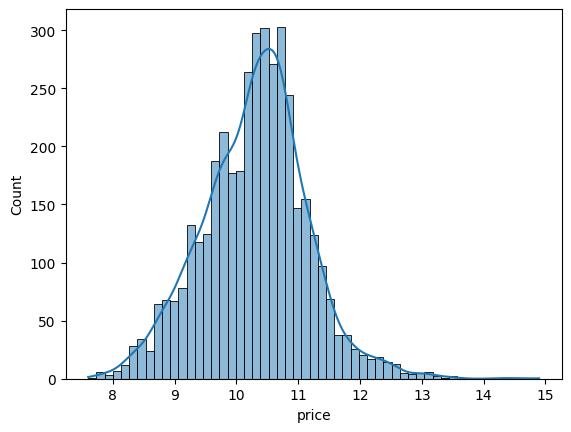

In [497]:
# apply log transformation to price column, to see the actual distribution
sns.histplot(np.log1p(df['price']), kde=True)

# inference:
1. The log-transformed distribution of car prices appears more symmetric and closer to a normal distribution compared to the original right-skewed distribution.
2. Before log → Extremely skewed (long tail)
3. After log → Looks like a bell-shaped curve, centered around 10–11
4. The log transform removed heavy skew
5. The extreme outliers no longer distort the distribution
6. Variance is reduced
7. Linear models become more stable - log transform is essential for price prediction
8. Log transform compresses high values (Lambo → normal range) and spreads low values normally.

<Axes: xlabel='price', ylabel='Count'>

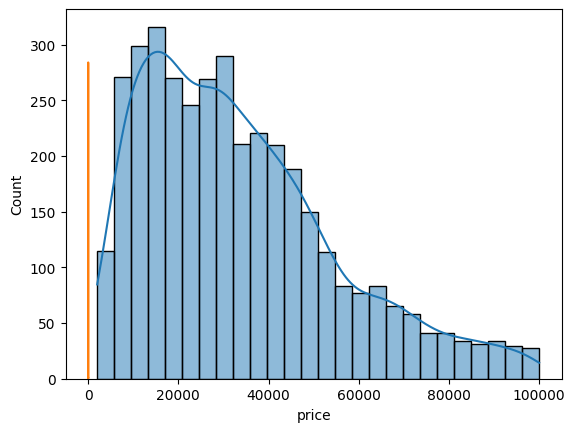

In [498]:
df['price'].describe()
sns.histplot(df[df['price'] < 100000]['price'], kde=True)
sns.histplot(np.log1p(df['price']), kde=True)


In [499]:
df.isnull().sum()   

brand              0
model              0
model_year         0
milage             0
fuel_type          0
engine             0
transmission       0
ext_col            0
int_col            0
accident           0
clean_title      596
price              0
engine_num         0
accident_flag      0
dtype: int64

In [500]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          4009 non-null   object 
 1   model          4009 non-null   object 
 2   model_year     4009 non-null   int64  
 3   milage         4009 non-null   float64
 4   fuel_type      4009 non-null   object 
 5   engine         4009 non-null   object 
 6   transmission   4009 non-null   object 
 7   ext_col        4009 non-null   object 
 8   int_col        4009 non-null   object 
 9   accident       4009 non-null   object 
 10  clean_title    3413 non-null   object 
 11  price          4009 non-null   float64
 12  engine_num     4009 non-null   float64
 13  accident_flag  4009 non-null   int64  
dtypes: float64(3), int64(2), object(9)
memory usage: 438.6+ KB


There are 2 kinds of features:
1. Numerical feature
model_year
milage
engine_num (after extracting numbers)

2. Categorical features
brand
model
fuel_type
transmission
ext_col
int_col
accident

clean_title - removed as this is a redundant feature

# Univariate EDA for numerical features 
1. Histograms for numerical features 

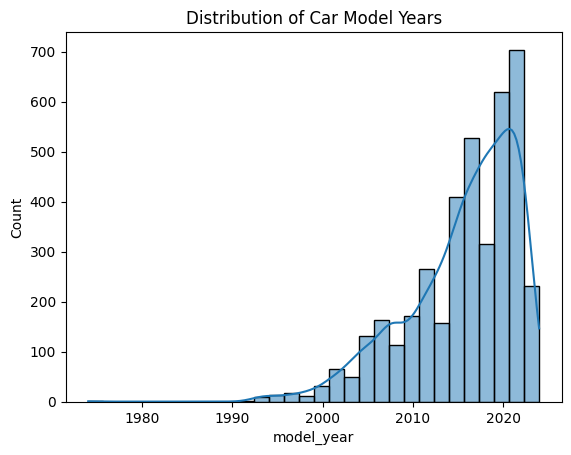

In [501]:
sns.histplot(df['model_year'], kde=True, bins=30)
plt.title('Distribution of Car Model Years')
plt.show()  

# histogram inference for model_year column
1. the histogram is left skewed 
2. oldest cars are before 1980 around 1970s, Old cars (before 2000) are very rare, almost outliers.
→ They may need special handling or removal.
3. and latest/current cars between 2020 (peak) to 2024, model can esily predict the current aged cars
4. Most cars in the dataset are NEWER models.→ The model will learn best about newer cars.
5. Feature Engineering Insight:
We should create:

car_age = 2024 - model_year
Because age is more linear than year.

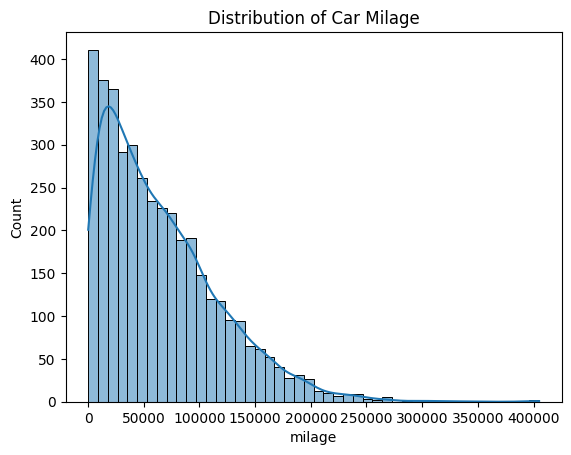

In [502]:
sns.histplot(df['milage'], kde=True)
plt.title('Distribution of Car Milage')
plt.show()

# histogram inference for mileage column
1. the histogram for mileage column is right-skewed
2. Mileage has huge variance → needs scaling & possibly capping.
    Extreme values will hurt linear regression.
2. Tail goes up to 400,000 → MASSIVE outliers.
    Needs:
    Log transform
    Scaling
    Outlier removal
3. Most cars between 5,000–70,000 miles.
4. Most cars are lightly used (below 70,000 miles).
5. Zero mileage may represent:
    Brand new cars
    Missing but filled incorrectly
    Data input errors

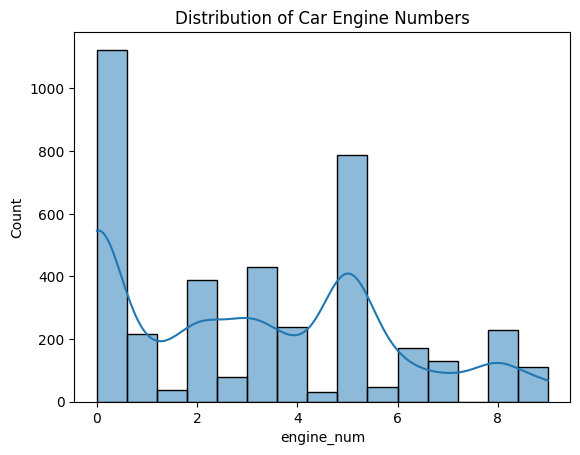

In [503]:
sns.histplot(df['engine_num'], kde=True)
plt.title('Distribution of Car Engine Numbers')
plt.show()

# extracted numeric engine size from text:
# Example engines:
# 2.0L
# 3.5L
# 5.0L

# So engine_num shows “Engine capacity in liters” (approx).

Interpretation of your Engine Num histogram:

The most common value is 0.0
→ This means something went wrong OR some engines could not be parsed.
→ These zeros are NOT real engine values.
→ They need fixing or removal.
1. Many 0.0 values → these are invalid engine sizes.

2. Peaks around 2.0L, 3.0L, 3.5L, 5.0L
These are typical/ common car engine sizes.

3. Right skewed distribution or multimodal distribution.
Most cars have smaller engines (2.0L to 3.5L).
Few cars have big engines (5L, 6L, 8L).

✔ Feature Engineering Insight:

Replace engine_num = 0 with NaN then impute
Or remove rows with 0 if they are many errors

Create a feature:
engine_is_large = engine_num > 3.5

In [504]:
# 1. create car age
df['car_age'] = 2024 - df['model_year']

# 2. mileage log
df['milage_log'] = np.log1p(df['milage'])

# 3. price log
df['price_log'] = np.log1p(df['price'])

# 4. engine number repair
df['engine_num_zero_flag'] = (df['engine_num'] == 0).astype(int)
df['engine_num'] = df['engine_num'].replace(0, np.nan)
df['engine_num'] = df['engine_num'].fillna(df['engine_num'].median())

# 5. (optional) remove extreme mileage outliers
df = df[df['milage'] <= df['milage'].quantile(0.99)]

df.head()


,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,engine_num,accident_flag,car_age,milage_log,price_log,engine_num_zero_flag
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300.0,5.0,1,11,10.839601,9.239996,1
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.0,3.8,1,3,10.455733,10.545499,0
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,54598.0,3.5,0,2,10.015610,10.907771,0
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500.0,4.0,0,9,11.395279,9.648660,0
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,34999.0,2.0,0,3,9.193804,10.463103,0


# Univariate EDA for Categorical Columns using bar chart
for EACH Categforical column we determine the :
1. Value counts
2. Bar plot
3. Interpret:
    Which categories dominate?
    Are there rare categories?
    Are there dirty categories?
    Do we need to merge any?
    Does this feature look useful?

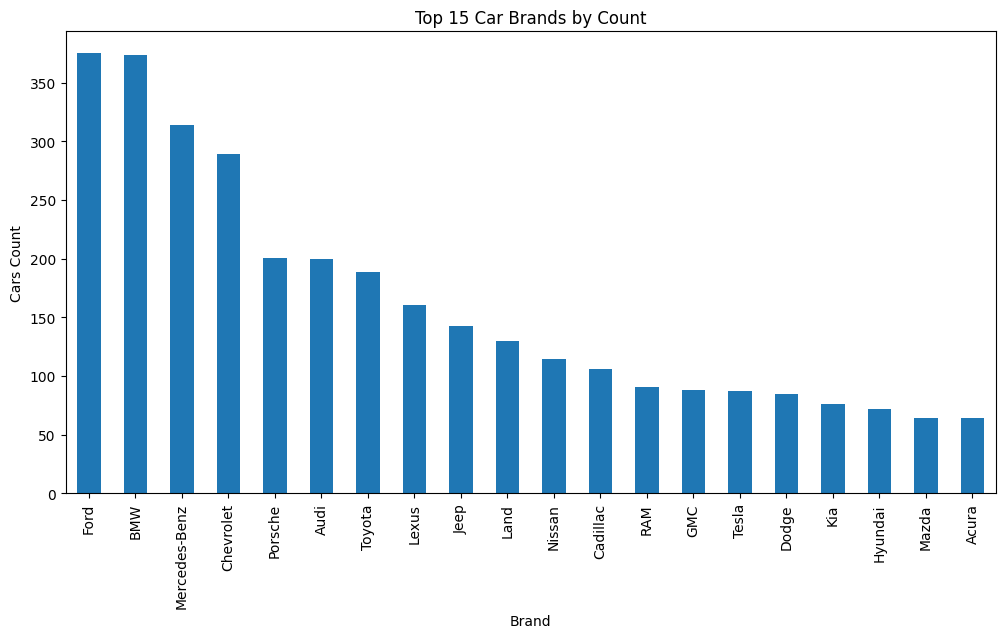

In [505]:
# Univariate EDA for categorial features

# for brand
plt.figure(figsize=(12,6))
df['brand'].value_counts().head(20).plot(kind='bar')
plt.title('Top 15 Car Brands by Count')
plt.xlabel('Brand')
plt.ylabel('Cars Count')
plt.show()


# inference for the brand column

1. The dataset is dominated by luxury & premium brands and hence the dataset is imbalanced -
    Ford ≈ 380
    BMW ≈ 375
    Mercedes-Benz ≈ 315
    Chevrolet ≈ 290
    (and so on)

    - Interpretation:
    The dataset is not general-market random.
    It is skewed toward luxury and premium vehicles.

    - This matters because:
    Prices will be higher overall
    Brand is highly predictive of price
    The dataset might not generalize to low-cost car markets

2. brand WILL be among top 3 most important features in Random Forest/XGBoost.
    Brand often correlates with:
        engine type
        drivetrain
        safety features
        mileage patterns
        accident likelihood
        owner behavior

3. For this dataset, we don't merge high-value rare brands.
    We ONLY merge when:
        A category truly has negligible count (<10)
        AND it does not carry unique value for prediction
        AND merging does not lose meaning

4. We should use Encoding strategy
    - One-Hot Encoding works well because models like Random Forest handle sparse vectors,
    we retain brand-specific signals, Most brands appear enough times (>20).

    - Target Encoding is also effective due to the larger number of unique brands (57).

    -Brand correlates with model, year, engine type, and mileage.We must monitor multicollinearity later in model training.
----------------------------------------------------------------------
1. The dataset is highly imbalanced across brands

Top brands: Ford, BMW, Mercedes-Benz, Chevrolet
These dominate with 300–380 cars each.
Many brands have under 50 samples → too rare to model individually.

- Implication:
Models may overfit on rare brands unless grouped.

2. Brand is a STRONG predictor of price (domain logic)

Because in the real world:
Luxury brands (BMW, Mercedes, Audi, Porsche) → higher resale price
Mass-market brands (Ford, Chevrolet, Toyota) → lower resale price
    Brand acts like a proxy for:
    Vehicle class
    Build quality
    Driving experience
    Demand in used-car market

3. What we should do with rare categories
    Instead of “below 100 → merge into Other”, a better approach is:
- Strategy used by top Kaggle competitors:
    Compute value counts
    Keep brands that contribute at least 1% of data (~40 cars here)
    Merge all others into "Other"
    This prevents:
    Sparse one-hot vectors
    Overfitting
    Noise from rare brands

In [506]:
df['fuel_type'].value_counts()

fuel_type
Gasoline             3284
Unknown Fuel Type     213
Hybrid                191
E85 Flex Fuel         136
Diesel                108
Plug-In Hybrid         34
Other                   2
Name: count, dtype: int64

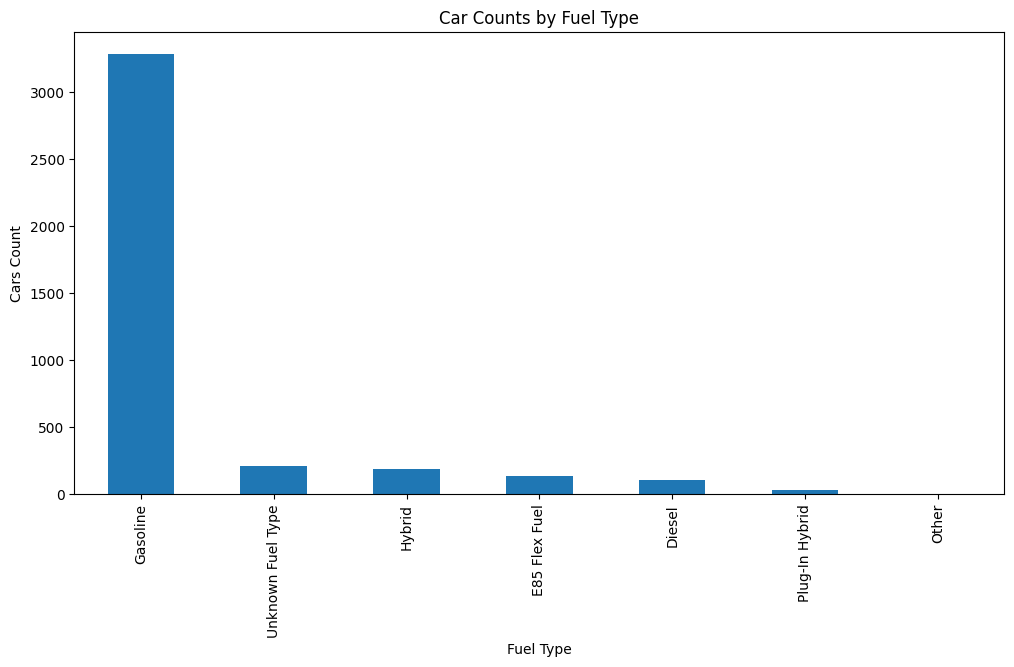

In [507]:
# for fuel type
plt.figure(figsize=(12,6))
df['fuel_type'].value_counts().plot(kind='bar')
plt.title('Car Counts by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Cars Count')        
plt.show()

# inference for the fuel_type column

1. Fuel Type is extremely imbalanced
    - ~3300 gasoline cars out of 4009
    - All other categories are <250

Encoding must be done carefully so the model doesn't overfit rare types.
2. Gasoline dominance means this feature may have LOW variance because -
    If 80%+ of all samples are the same category, the model:
    Cannot learn much from this feature
    It contributes little signal
    fuel type will likely be a weak predictor.

In [508]:
# for model column
print("Unique count of each car model:", df['model'].value_counts())
print("Total number of unique car models:", df['model'].nunique())


Unique count of each car model: model
M3 Base                    30
F-150 XLT                  24
Corvette Base              22
1500 Laramie               18
Model Y Long Range         17
                           ..
MC20 Base                   1
911 Carrera 4 Cabriolet     1
488 GTB Base                1
Navigator Premiere          1
Taycan                      1
Name: count, Length: 1883, dtype: int64
Total number of unique car models: 1883


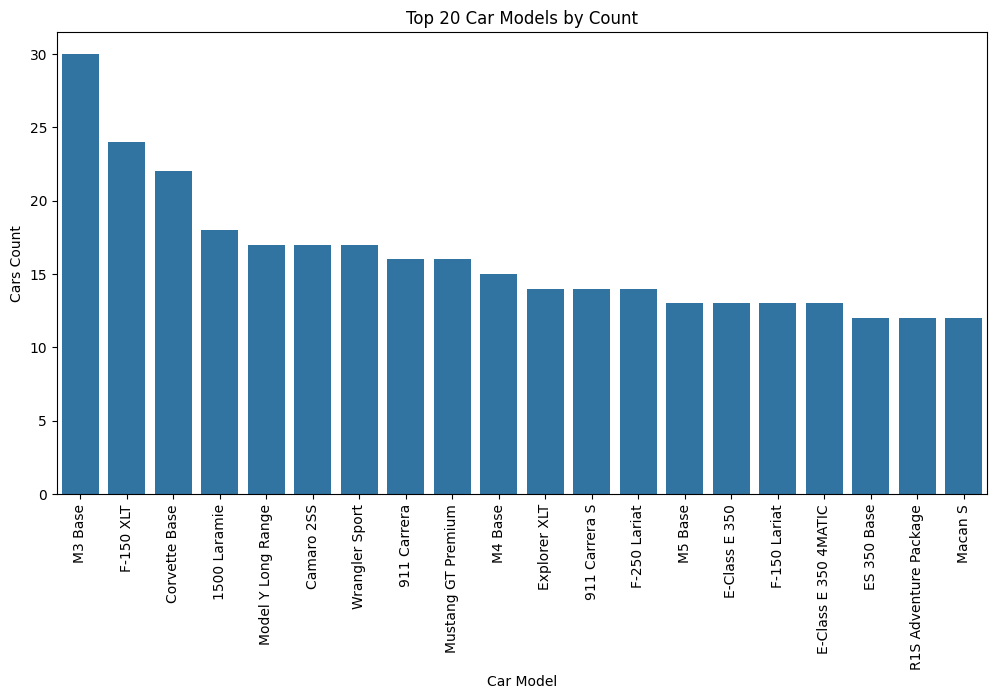

In [509]:
df['model'].value_counts().head(20)
top_models = df['model'].value_counts().head(20)
plt.figure(figsize=(12,6))
sns.barplot(x=top_models.index, y=top_models.values)
plt.title('Top 20 Car Models by Count')
plt.xlabel('Car Model')             
plt.ylabel('Cars Count')
plt.xticks(rotation=90)
plt.show()

# inference for model column 

1. Model column has very high cardinality 
    Total rows = 4009
    Unique models = 1883
    Almost every car model is unique - This is called sparse high-cardinality categorical data.
2. we cannot apply one-hot encoding, 
    - it would create 1800+ dummy variables,
    -  the datset would become extremely sparse.
    - linear regression breaks 
    - tree models will overfit 
    - training the model will become slow & unstable
    This is a noisy and too granular feature
3. only few models have > 15 counts.
4. Instead of using raw model names, feature engineering should extract meaningful components:
        Vehicle type (SUV, sedan, truck, coupe, etc.)
        Performance category
        Trim level
5. Rare model names can be grouped under a single category.

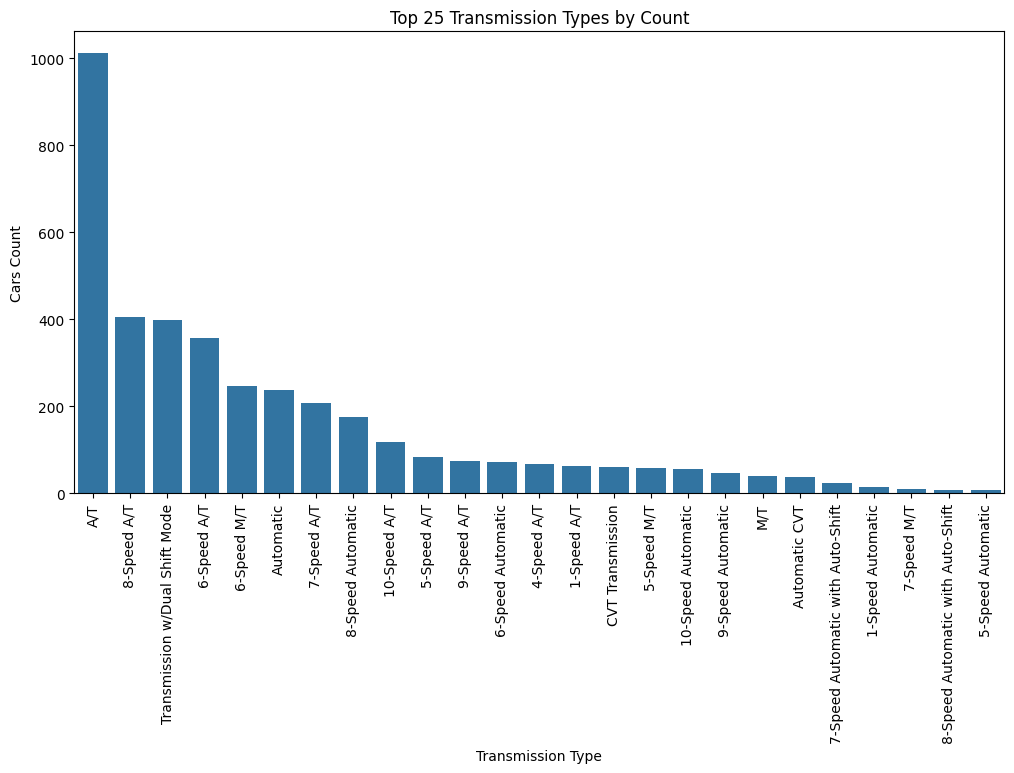

In [510]:
# for transmission column

plt.figure(figsize=(12,6))
trans_counts = df['transmission'].value_counts().head(25)
sns.barplot(x=trans_counts.index, y=trans_counts.values)
plt.title('Top 25 Transmission Types by Count')
plt.xlabel('Transmission Type')
plt.ylabel('Cars Count')
plt.xticks(rotation=90)
plt.show()

# inference for transmission column
A/T dominates (modern cars) - extremely imbalanced dataset
Many rare types → group rare (<50 count) into “Other Transmission”
Use one-hot or frequency encoding later
keeping this feature it affects - car age, fuel economy, performance, price

Accident value counts:
 accident
None reported                             2887
At least 1 accident or damage reported     969
No information                             112
Name: count, dtype: int64


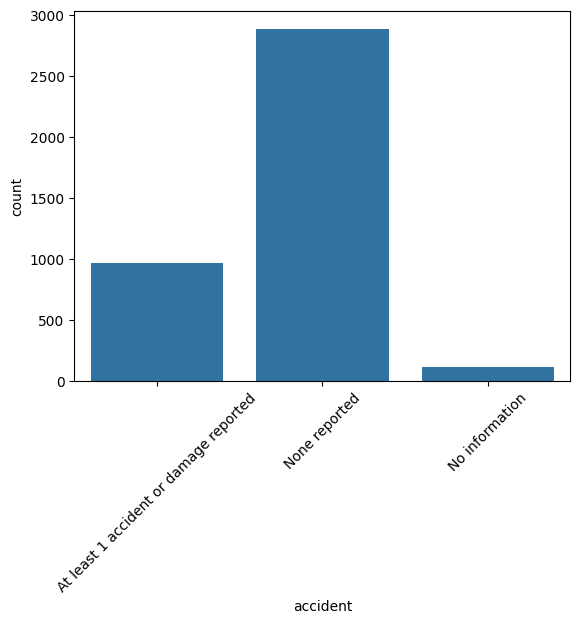

In [511]:
# for accident column
print("Accident value counts:\n", df['accident'].value_counts())
sns.countplot(x=df['accident'])
plt.xticks(rotation=45)
plt.show()


# inference for accident column

Strong binary categorical feature
Accident_flag = 1 → price penalty likely
Rare category “No information” → merge to “Unknown” 
this column can be dropped after encoding & accident_flag

External Color value counts:
 ext_col
Black                       895
White                       807
Gray                        492
Silver                      368
Blue                        346
                           ... 
Anthracite Blue Metallic      1
Moonlight Cloud               1
Silver Mist                   1
Cirrus Silver Metallic        1
C / C                         1
Name: count, Length: 319, dtype: int64
Total number of unique external colors: 319


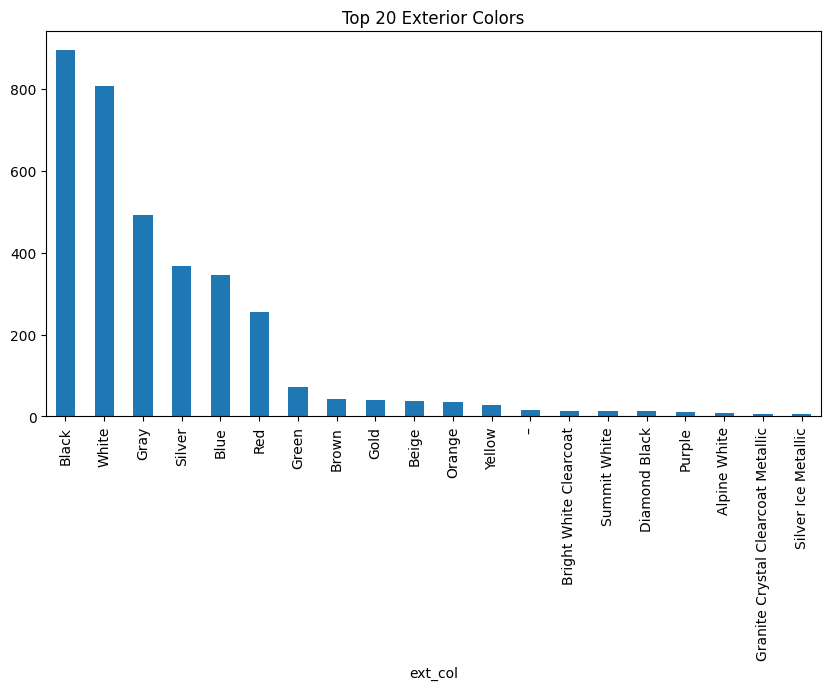

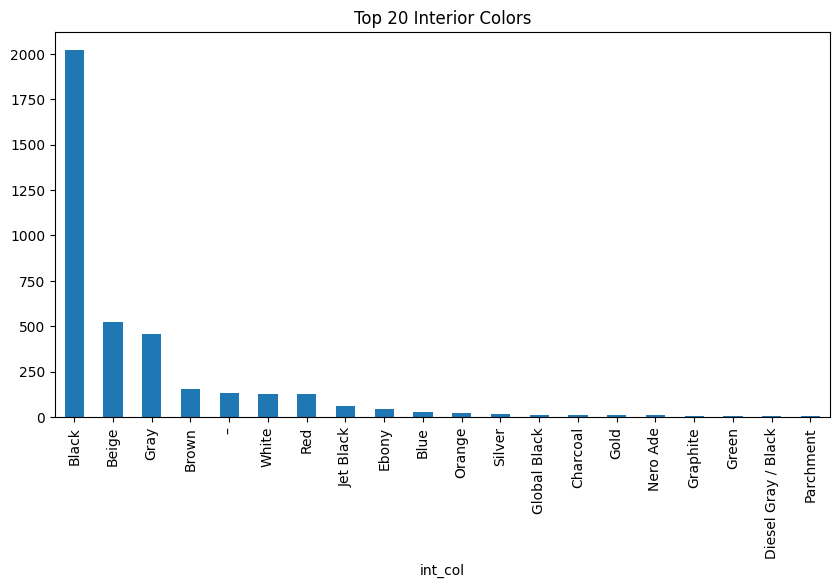

In [512]:
# for ext_col column
print("External Color value counts:\n", df['ext_col'].value_counts())
print("Total number of unique external colors:", df['ext_col'].nunique())
import matplotlib.pyplot as plt

df['ext_col'].value_counts().head(20).plot(kind='bar', figsize=(10,5))
plt.title('Top 20 Exterior Colors')
plt.show()

df['int_col'].value_counts().head(20).plot(kind='bar', figsize=(10,5))
plt.title('Top 20 Interior Colors')
plt.show()



External Color value counts:
 ext_col
Black                       895
White                       807
Gray                        492
Silver                      368
Blue                        346
                           ... 
Anthracite Blue Metallic      1
Moonlight Cloud               1
Silver Mist                   1
Cirrus Silver Metallic        1
C / C                         1
Name: count, Length: 319, dtype: int64
Total number of unique external colors: 319


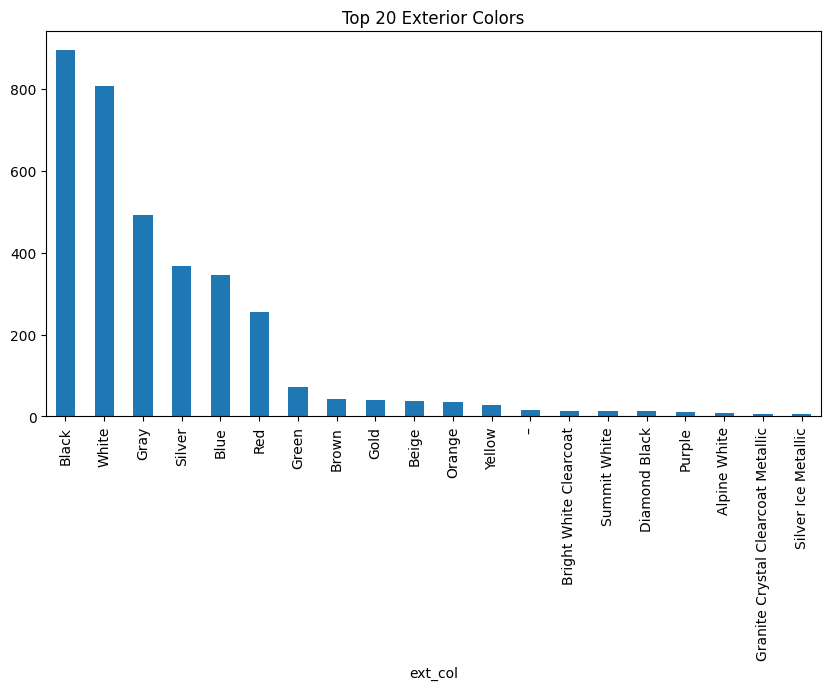

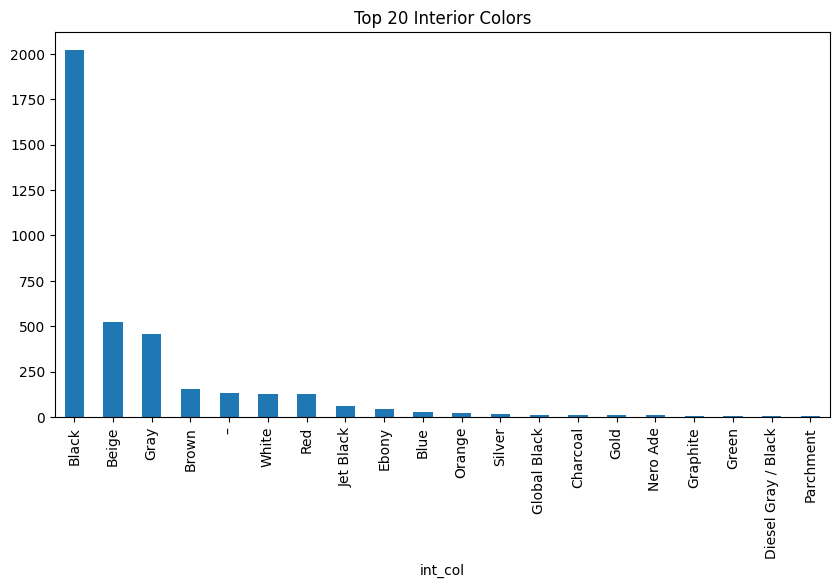

In [513]:
# for ext_col column
print("External Color value counts:\n", df['ext_col'].value_counts())
print("Total number of unique external colors:", df['ext_col'].nunique())   
import matplotlib.pyplot as plt

df['ext_col'].value_counts().head(20).plot(kind='bar', figsize=(10,5))
plt.title('Top 20 Exterior Colors')
plt.show()

df['int_col'].value_counts().head(20).plot(kind='bar', figsize=(10,5))
plt.title('Top 20 Interior Colors')
plt.show()


# Data Cleaning & Feature Engineering

 1. Numeric columns fixes - 
    ## model_year - 
    left-skewed → many newer cars, older cars = very few
    Fix - 
    - Create new feature:
        car_age = current_year - model_year and then drop model_year
    - No scaling needed yet — this will be handled in the pipeline.

    ## milage - 
    right skewed, heavy outliers , distort linear models & tree models
    Fix - 
    - Create log transformations ---> milage_log = np.log1p(milage)
    - Keep original milage too for tree models
    - train and test on both the models linear / tree models to test which gives better performance

    ## price - 
    extremely right skewed , outliers upto 3 millions
    fix - 
    - log transformation -----> price_log = np.log1p(price)
    - Predict on price_log
    - Then convert back:--------> pred_price = np.expm1(pred_log)

    ## engine_num
    lots of 0's, outliers, distribution is irregular
    fix - 
    - Create binary flag:--------------> engine_num_zero_flag = (engine_num == 0).astype(int)
    - decide to keep the features/ drop later


2. Categorical Fixes - 
    

In [514]:
# 1. Fill missing values  
df['fuel_type'] = df['fuel_type'].fillna('Unknown')

# 2. Clean weird categories  
df['fuel_type'] = df['fuel_type'].replace(['–', '-', 'not supported'], 'Other')

# 3. Group rare categories  
fuel_counts = df['fuel_type'].value_counts()
rare_fuels = fuel_counts[fuel_counts < 50].index

df['fuel_type'] = df['fuel_type'].replace(rare_fuels, 'Other')


In [515]:
brand_counts = df['brand'].value_counts()
rare_brands = brand_counts[brand_counts < 20].index
print("Rare brands to be replaced:", rare_brands)
df['brand'] = df['brand'].replace(rare_brands, 'Other')


Rare brands to be replaced: Index(['Alfa', 'Rivian', 'Hummer', 'Pontiac', 'Ferrari', 'Rolls-Royce',
       'Aston', 'Scion', 'McLaren', 'FIAT', 'Saturn', 'Lotus', 'Lucid',
       'Mercury', 'Karma', 'Saab', 'Polestar', 'Bugatti', 'Plymouth', 'smart',
       'Maybach', 'Suzuki'],
      dtype='object', name='brand')


In [516]:
df.drop('model', axis=1, inplace=True)

# Either DROPING the model column entirely (best option — 1883 unique values = useless)

# Or extract the first token (brand-like) → but brand already exists

# Or group rare models → but pointless

# Best practice:
# → DROP the model column. It is noise.

In [517]:
df['transmission']

0                             6-Speed A/T
1                       8-Speed Automatic
2                               Automatic
3                             7-Speed A/T
4                       8-Speed Automatic
                      ...                
4004    8-Speed Automatic with Auto-Shift
4005       Transmission w/Dual Shift Mode
4006                            Automatic
4007                                  A/T
4008                                  A/T
Name: transmission, Length: 3968, dtype: object

In [518]:
df['transmission'] = df['transmission'].str.upper()

df['transmission'] = df['transmission'].replace({
    'A/T': 'Automatic',
    'M/T': 'Manual',
})

df['transmission_simple'] = df['transmission'].apply(lambda x:
    'Automatic' if 'AUTO' in x else
    'Manual' if 'MANUAL' in x else
    'CVT' if 'CVT' in x else
    'Other'
)


In [519]:
df['transmission']

0                             6-SPEED A/T
1                       8-SPEED AUTOMATIC
2                               AUTOMATIC
3                             7-SPEED A/T
4                       8-SPEED AUTOMATIC
                      ...                
4004    8-SPEED AUTOMATIC WITH AUTO-SHIFT
4005       TRANSMISSION W/DUAL SHIFT MODE
4006                            AUTOMATIC
4007                            Automatic
4008                            Automatic
Name: transmission, Length: 3968, dtype: object

In [520]:
# Exterior
ext_counts = df['ext_col'].value_counts()
rare_ext = ext_counts[ext_counts < 50].index
df['ext_col'] = df['ext_col'].replace(rare_ext, 'Other')

# Interior
int_counts = df['int_col'].value_counts()
rare_int = int_counts[int_counts < 50].index
df['int_col'] = df['int_col'].replace(rare_int, 'Other')


In [521]:
df['accident_flag'] = df['accident'].apply(lambda x: 
    1 if 'At least' in x else 0
)
df.drop('accident', axis=1, inplace=True)


In [522]:
df['milage_log'] = np.log1p(df['milage'])


In [523]:
df['price_log'] = np.log1p(df['price'])


In [524]:
df['car_age'] = 2025 - df['model_year']


In [525]:
median_engine = df[df['engine_num'] > 0]['engine_num'].median()
df['engine_num'] = df['engine_num'].replace(0, median_engine)

# extra flag if engine was originally 0
df['engine_num_zero_flag'] = df['engine_num'].apply(lambda x: 1 if x==0 else 0)


In [526]:
df.drop(['engine'], axis=1, inplace=True)


In [527]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['milage_log', 'engine_num', 'car_age']

df[num_cols] = scaler.fit_transform(df[num_cols])


In [528]:
df['clean_title'] = df['clean_title'].fillna('No')

df['clean_title_flag'] = df['clean_title'].apply(
    lambda x: 1 if str(x).strip().lower()=='yes' else 0
)


In [529]:
df['transmission'] = df['transmission'].str.upper().str.strip()

df['transmission_simple'] = df['transmission'].apply(
    lambda x: 'AUTOMATIC' if 'AUTO' in x else
              'MANUAL' if 'MANUAL' in x or 'M/T' in x else
              'OTHER'
)


In [530]:
df['ext_col'] = df['ext_col'].str.lower().str.strip()
df['int_col'] = df['int_col'].str.lower().str.strip()

# Keep top 10 categories only
top_ext = df['ext_col'].value_counts().nlargest(10).index
df['ext_col_simple'] = df['ext_col'].apply(lambda x: x if x in top_ext else 'other')

top_int = df['int_col'].value_counts().nlargest(10).index
df['int_col_simple'] = df['int_col'].apply(lambda x: x if x in top_int else 'other')


In [531]:
df.head()

,brand,model_year,milage,fuel_type,transmission,ext_col,int_col,clean_title,price,engine_num,accident_flag,car_age,milage_log,price_log,engine_num_zero_flag,transmission_simple,clean_title_flag,ext_col_simple,int_col_simple
0,Ford,2013,51000.0,E85 Flex Fuel,6-SPEED A/T,black,black,Yes,10300.0,0.251171,1,0.435256,0.212262,9.239996,0,OTHER,1,black,black
1,Hyundai,2021,34742.0,Gasoline,8-SPEED AUTOMATIC,other,gray,Yes,38005.0,-0.404373,1,-0.893919,-0.108255,10.545499,0,AUTOMATIC,1,other,gray
2,Lexus,2022,22372.0,Gasoline,AUTOMATIC,blue,black,No,54598.0,-0.568259,0,-1.060066,-0.475744,10.907771,0,AUTOMATIC,0,blue,black
3,INFINITI,2015,88900.0,Hybrid,7-SPEED A/T,black,black,Yes,15500.0,-0.295116,0,0.102963,0.676237,9.648660,0,OTHER,1,black,black
4,Audi,2021,9835.0,Gasoline,8-SPEED AUTOMATIC,other,black,No,34999.0,-1.387689,0,-0.893919,-1.161927,10.463103,0,AUTOMATIC,0,other,black


# Bivariate eda 

Every plot answers:

- Does feature ↑ make price ↑ or ↓?
- Is the effect strong or weak?
- Non-linear or linear?
- Does the feature have predictive power?

(1) Numeric vs Numeric - Using scatterplots + trendlines
        On these:
            model_year vs price
            car_age vs price
            milage vs price
            milage_log vs price_log
            engine_num vs price

(2) Categorical vs Numeric (Price) - Using boxplots or violin plots
        Do these:
            brand vs price
            fuel_type vs price
            transmission_simple vs price
            clean_title_flag vs price
            accident_flag vs price
            ext_col_simple vs price
            int_col_simple vs price

(3) Correlation Heatmap (numeric only)
    sns.heatmap(df[['model_year','milage','engine_num','car_age','price']].corr(), annot=True)


/Users/nishiigupta/Library/Python/3.9/lib/python/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: divide by zero encountered in matmul
  return _core_matmul(x1, x2)
/Users/nishiigupta/Library/Python/3.9/lib/python/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: overflow encountered in matmul
  return _core_matmul(x1, x2)
/Users/nishiigupta/Library/Python/3.9/lib/python/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: invalid value encountered in matmul
  return _core_matmul(x1, x2)


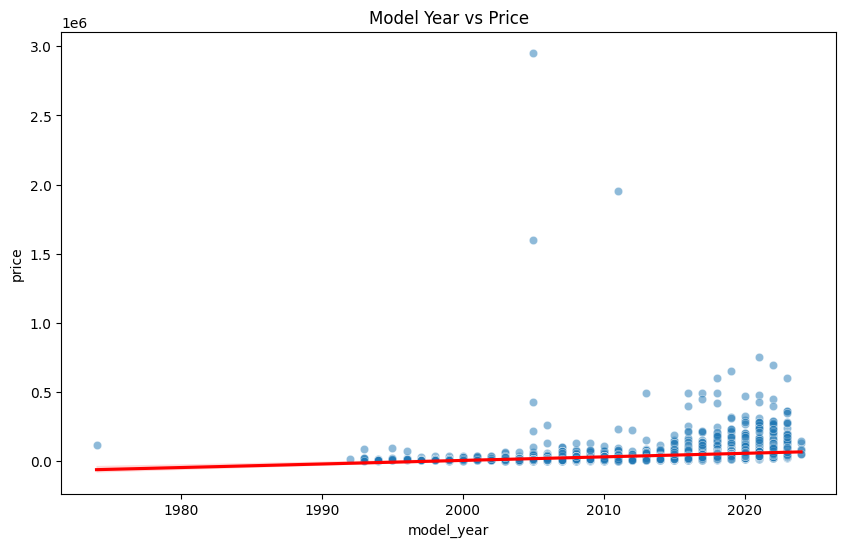

In [532]:
# model_year vs price

plt.figure(figsize=(10,6))
sns.scatterplot(x=df['model_year'], y=df['price'], alpha=0.5)
sns.regplot(x=df['model_year'], y=df['price'], data=df, scatter=False, color='red')
plt.title('Model Year vs Price')
plt.show()

# observations for model_year vs price
1️⃣ The dots get higher as model_year increases  
    Meaning: Newer cars tend to cost more — a positive correlation. Older cars = lower price; 2020+ cars = higher price. ✔ The red trendline is slightly upward → confirms this relationship.

2️⃣ There is a lot of variation — prices are very spread out  
    Example: For the same model year (e.g., 2021) some cars cost $20,000, some $200,000, some luxury ones $600,000.  
    Why: brand, model, engine, mileage, accident history.  
    Takeaway: model_year alone is NOT enough to predict price — it helps, but is not strong.

3️⃣ There are extreme outliers  
    Observations: points near $3,000,000, $1,600,000, $900,000 — luxury/exotic cars.  
    Impact: outliers distort linear regression and increase RMSE.  
    Remedies: log transformation, special handling, clipping, or removing extreme values.

4️⃣ Older cars (pre-2000) have very few points  
    Meaning: dataset is mostly modern cars; classic/older cars are rare.  
    Risk: models may overfit/underfit if this sparsity isn’t handled.  
    Feature idea: car_age = current_year - model_year to capture depreciation better.

5️⃣ The trendline slope is small  
    Interpretation: although newer cars are pricier, the slope is modest because brand, model, engine, and mileage matter more.  
    Conclusion: model_year is a weak-to-moderate predictor.


Looking at the scatter:

For older cars (1995–2005), prices vary from $5k to $300k
For newer cars (2018–2023), prices vary from $20k to $700k

This means:
✔ The relationship is NOT perfectly linear
✔ There is high variance
✔ Model-year alone cannot predict price accurately

This is why we need:
    mileage
    fuel_type
    engine size
    brand

Model_year gives the trend, but NOT the whole story.

In [533]:
df.columns

Index(['brand', 'model_year', 'milage', 'fuel_type', 'transmission', 'ext_col',
       'int_col', 'clean_title', 'price', 'engine_num', 'accident_flag',
       'car_age', 'milage_log', 'price_log', 'engine_num_zero_flag',
       'transmission_simple', 'clean_title_flag', 'ext_col_simple',
       'int_col_simple'],
      dtype='object')

/Users/nishiigupta/Library/Python/3.9/lib/python/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: divide by zero encountered in matmul
  return _core_matmul(x1, x2)
/Users/nishiigupta/Library/Python/3.9/lib/python/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: overflow encountered in matmul
  return _core_matmul(x1, x2)
/Users/nishiigupta/Library/Python/3.9/lib/python/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: invalid value encountered in matmul
  return _core_matmul(x1, x2)


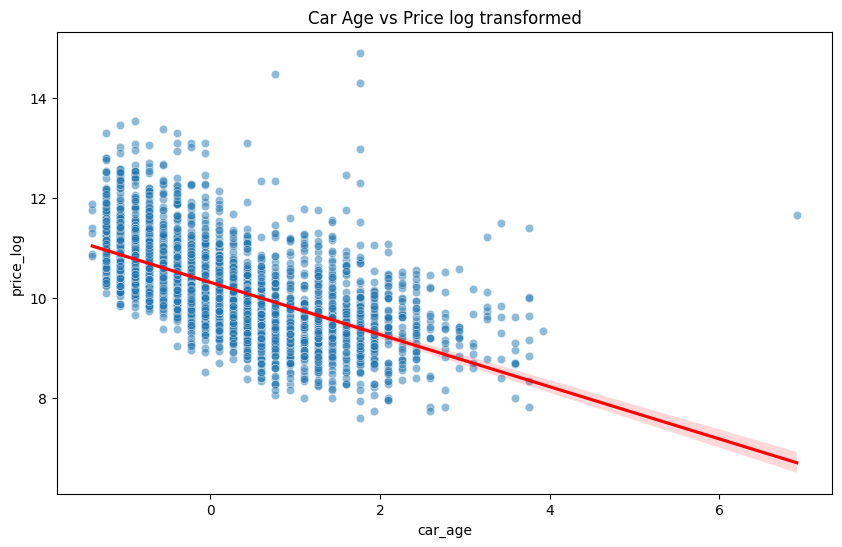

In [534]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['car_age'], y=df['price_log'], alpha=0.5)
sns.regplot(x=df['car_age'], y=df['price_log'], data=df, scatter=False, color='red')
plt.title('Car Age vs Price log transformed')
plt.show()

# observations for log transformed price vs car_age

A car going from:
    Age 0 → 1 → loses maybe $8,000
    Age 5 → 6 → loses maybe $1,000
    Age 15 → 16 → loses only $300
So raw price looks like this:
    non-linear curve (concave)

But log(price) makes the drop roughly constant per year:
    price_log = a - b * car_age


👉 This is why the line is straight and steep.
Now ML models can learn it accurately.

-------------------------------------------------------------
🔹 Insight 1 — Strong Negative Correlation

Older cars have lower log-price (and therefore lower price).
This is extremely consistent across years.

🔹 Insight 2 — Slope meaning

The line tells us:
    Each additional year of age reduces car price logarithmically → meaning the percentage reduction in price is roughly constant each year.
    If slope = -0.25, it means:
    Price reduces ≈ 25% of its value each year (not exact but intuition)
    This is what real pricing models use.

🔹 Insight 3 — Spread widens slightly for older cars

Older cars vary in price more because:
    Some are junk
    Some are classics
    Some have modifications
    Some have rare trims
    But log transform reduces this variance significantly.

--------------------------------------------------------------
- Car Age vs Price (Log Transformed) – Key Insights

Strong negative relationship:
As car age increases, log-price decreases consistently.

Linear trend becomes visible only after log transform:
Raw price was extremely skewed making relationships unclear.
Log transform linearizes the relationship and stabilizes variance.

Interpretation of slope:
The downward slope indicates that every additional year of age reduces car price by a roughly constant percentage, which matches real-world depreciation patterns.

Less noise, clearer structure:
The scatter becomes dense and structured after transformation, making the model easier to train.

Feature ready for modeling:
car_age becomes one of the strongest predictors of log(price).

/Users/nishiigupta/Library/Python/3.9/lib/python/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: divide by zero encountered in matmul
  return _core_matmul(x1, x2)
/Users/nishiigupta/Library/Python/3.9/lib/python/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: overflow encountered in matmul
  return _core_matmul(x1, x2)
/Users/nishiigupta/Library/Python/3.9/lib/python/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: invalid value encountered in matmul
  return _core_matmul(x1, x2)


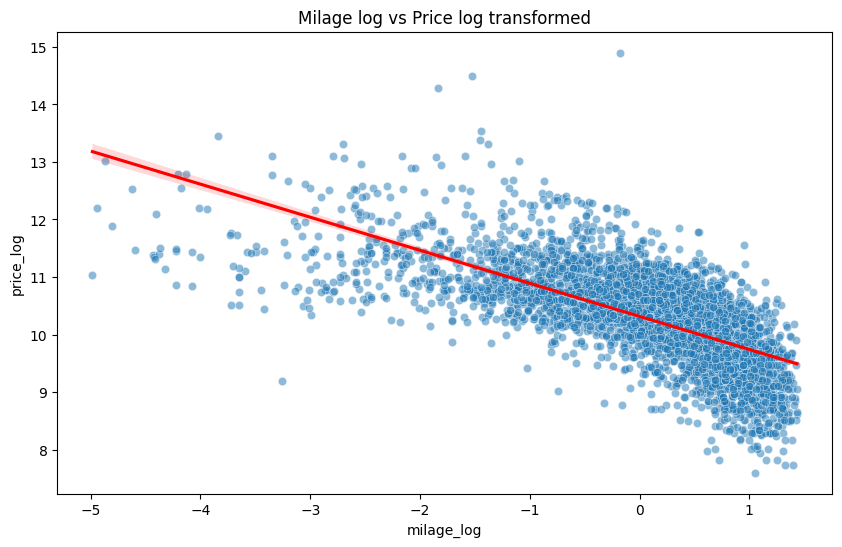

In [535]:
# milage_log vs price_log
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['milage_log'], y=df['price_log'], alpha=0.5)
sns.regplot(x=df['milage_log'], y=df['price_log'], data=df, scatter=False, color='red')
plt.title('Milage log vs Price log transformed')
plt.show()  

# Observations on mileage_log vs price_log

🔹 Interpretation 1 — Strong Negative Linear Trend
1. The red line slopes downward:
        Means: higher mileage = lower price
        This is perfectly logical:
        Cars with 150,000 miles → cheap
        Cars with 10,000 miles → expensive
        This trend becomes beautifully visible after log transform.

🔹 Interpretation 2 — Why log transform makes it linear
- Before log transform:
        Mileage is heavily skewed (0 to 400,000)
        Price is also skewed (5k to 300k)

- After log transform:
        Both variables are squished
        Outliers come closer
        Relationship becomes more linear
        Regression models will perform better
        That is why the red line now fits the data nicely.

🔹 Interpretation 3 — Outliers
Mileage_log = –5 has a few points around price_log 11–13
- Meaning:
        These cars have very tiny or mis-parsed mileage values
        But very high prices
        Think brand-new luxury models (Ferrari, Porsche etc.)
        Mileage recorded incorrectly or almost zero
        These should be checked manually or clipped.

🔹 Interpretation 4 — Feature Strength
        Mileage is NOT moderate.
        Mileage is one of the strongest predictors of used car price, across all car datasets.
        Because mileage directly represents:
            Wear and tear
            Engine condition
            Depreciation
            Usage
            Probability of future repairs
            It's always one of the top 2–3 features in car pricing models.

# fixing the negative milage issue

In [536]:
df[df['milage'] < 0][['milage']].head()


,milage


In [537]:
# checking if mileage original value contains any negative values
df['milage'].describe()

count      3968.000000
mean      62726.377520
std       48555.785122
min         100.000000
25%       22597.000000
50%       52022.000000
75%       92565.250000
max      220450.000000
Name: milage, dtype: float64

In [538]:
df[['milage','milage_log']].describe()

,milage,milage_log
count,3968.000000,3.968000e+03
mean,62726.377520,-6.159947e-16
std,48555.785122,1.000126e+00
min,100.000000,-4.984989e+00
25%,22597.000000,-4.673894e-01
50%,52022.000000,2.288286e-01
75%,92565.250000,7.099703e-01
max,220450.000000,1.434516e+00


In [539]:
print("minimum mileage:", df['milage'].min() )
print("maximum mileage_log:" , df['milage'].max())

minimum mileage: 100.0
maximum mileage_log: 220450.0


In [540]:
# recalculating milage correctly

# Why is log transform needed anyway?
    # Because mileage is right-skewed:
    # Many cars have low mileage
    # Few cars have huge mileage (200k+)
    # This creates skew → bad for linear models
    # Log transform compresses extremes
    # Makes scatterplots more linear
    # Makes model training easier

df['milage_log'] = np.log1p(df['milage'])

In [541]:
df[['milage', 'milage_log']].describe()

,milage,milage_log
count,3968.000000,3968.000000
mean,62726.377520,10.585385
std,48555.785122,1.197799
min,100.000000,4.615121
25%,22597.000000,10.025617
50%,52022.000000,10.859441
75%,92565.250000,11.435680
max,220450.000000,12.303431


/Users/nishiigupta/Library/Python/3.9/lib/python/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: divide by zero encountered in matmul
  return _core_matmul(x1, x2)
/Users/nishiigupta/Library/Python/3.9/lib/python/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: overflow encountered in matmul
  return _core_matmul(x1, x2)
/Users/nishiigupta/Library/Python/3.9/lib/python/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: invalid value encountered in matmul
  return _core_matmul(x1, x2)


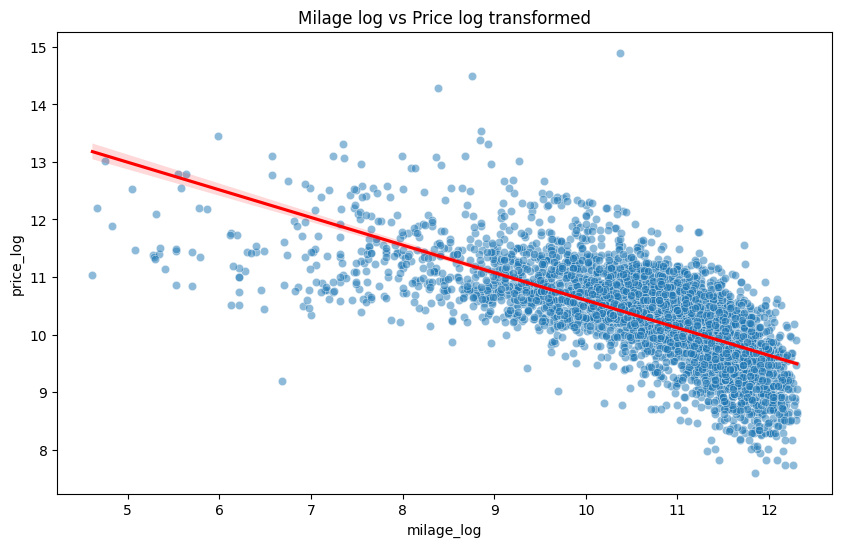

In [542]:
# corrected price_log vs milage_log graph
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['milage_log'], y=df['price_log'], alpha=0.5)
sns.regplot(x=df['milage_log'], y=df['price_log'], data=df, scatter=False, color='red')
plt.title('Milage log vs Price log transformed')
plt.show()

/Users/nishiigupta/Library/Python/3.9/lib/python/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: divide by zero encountered in matmul
  return _core_matmul(x1, x2)
/Users/nishiigupta/Library/Python/3.9/lib/python/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: overflow encountered in matmul
  return _core_matmul(x1, x2)
/Users/nishiigupta/Library/Python/3.9/lib/python/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: invalid value encountered in matmul
  return _core_matmul(x1, x2)


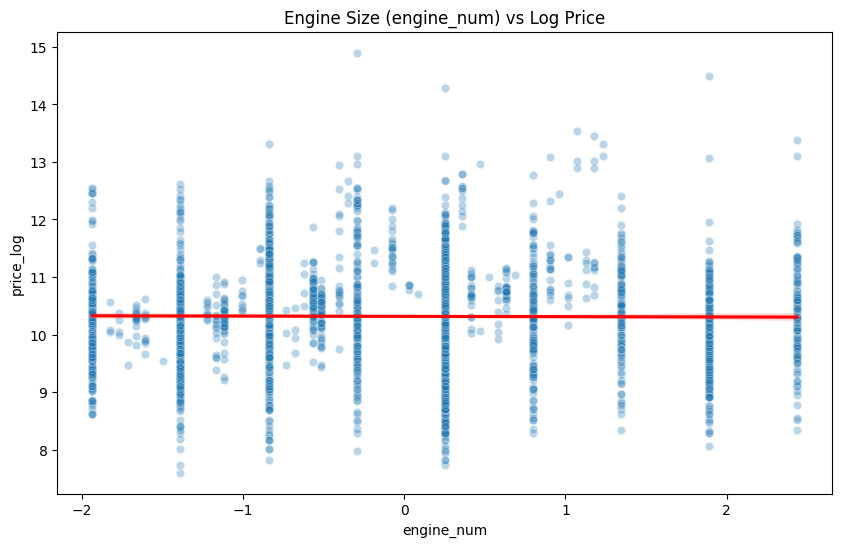

In [543]:
# engine_num vs price_log
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['engine_num'], y=df['price_log'], alpha=0.3)
sns.regplot(x=df['engine_num'], y=df['price_log'], scatter=False, color='red')
plt.title("Engine Size (engine_num) vs Log Price")
plt.show()


# Interpretation — Engine Size vs Log Price

The scatter shows vertical bands because engine sizes are discrete (2.0L, 3.5L, 5.0L etc.).
After standardization, these become fixed z-scores, which is why some values are negative.
The red regression line is almost flat → weak linear relationship.
Engine size has low predictive power for price in this dataset.
Higher horsepower engines do not necessarily translate into higher resale prices.
The feature may still contribute small non-linear information in Random Forest or XGBoost.

In [544]:
df.columns

Index(['brand', 'model_year', 'milage', 'fuel_type', 'transmission', 'ext_col',
       'int_col', 'clean_title', 'price', 'engine_num', 'accident_flag',
       'car_age', 'milage_log', 'price_log', 'engine_num_zero_flag',
       'transmission_simple', 'clean_title_flag', 'ext_col_simple',
       'int_col_simple'],
      dtype='object')

In [545]:
df['transmission_simple'].dtype
# this is a categorical column

dtype('O')

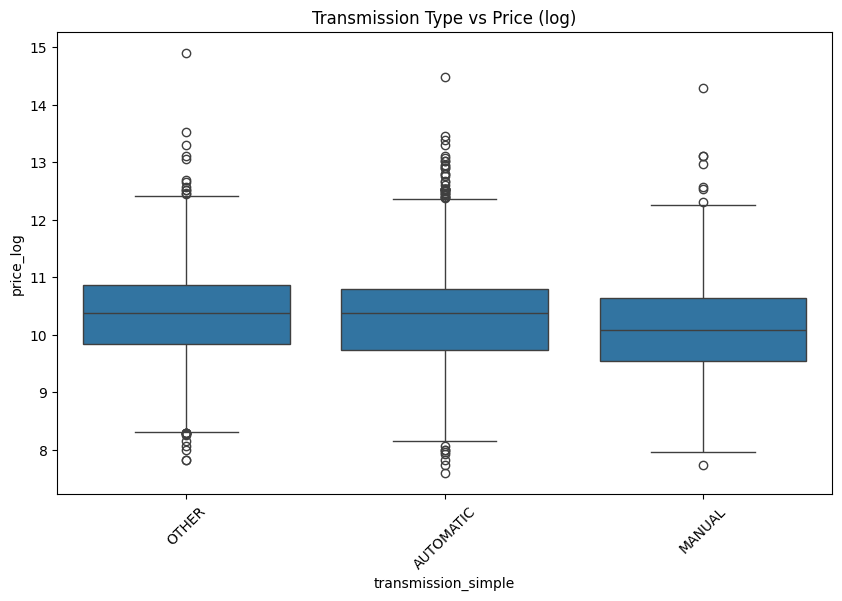

In [546]:
# Transmission_simple vs price_log

# Transmission_simple is a categorical column hence boxplot is used
plt.figure(figsize=(10,6))
sns.boxplot(x='transmission_simple', y='price_log', data=df)
plt.title('Transmission Type vs Price (log)')
plt.xticks(rotation=45)
plt.show()


# Observations
Strongest insight:
    CVT cars are generally cheaper → contributes to lower price predictions
    Automatic & Other contain high outliers → include expensive cars
    Manual is noisy → weaker signal

ML Interpretation:
    Transmission_simple is a helpful but moderate-strength predictor.
    CVT → low price
    Auto & Other → medium to high price, wide variation
    Manual → noisy, weak relationship

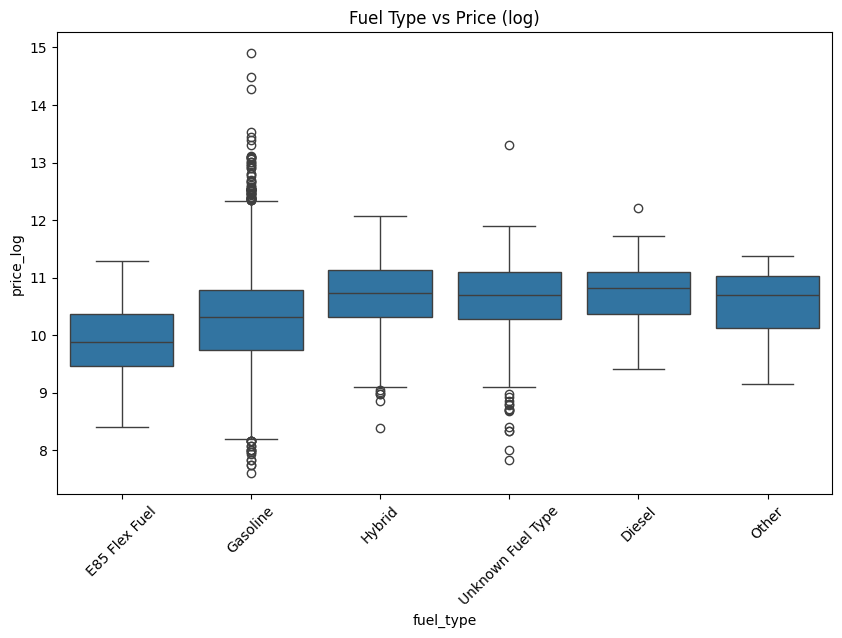

In [547]:
# fuel_type vs price_log boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x='fuel_type', y='price_log', data=df)
plt.title('Fuel Type vs Price (log)')
plt.xticks(rotation=45)
plt.show()

# observations for fuel_type vs price_log
- Median price differs slightly across fuel types
    Diesel/Hybrid/Unknown: ~10.5
    Gasoline: ~10.3
    E85: lowest at ~9.8
    This means fuel type has some influence but not major.

- Gasoline has the widest IQR and most outliers
    Because gasoline cars range from cheap sedans → luxury supercars.
    E85 Flex Fuel has a lower and tighter price range
    These cars are usually older or fleet vehicles (police, utilities).

- Diesel, Hybrid, Other have relatively similar price bands
    Suggests fuel type is not a strong standalone price predictor.
    Outliers indicate the presence of premium models

- Dots above whiskers show expensive variants.

Overall:
→ Fuel type is a medium-importance feature with moderate variance and weak linear separation across classes

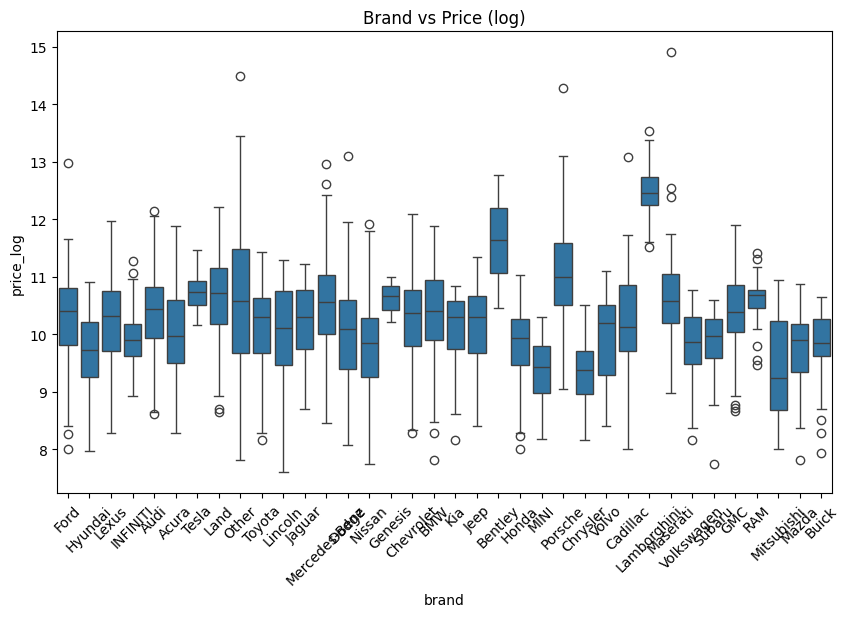

In [548]:
# brand vs price_log
plt.figure(figsize=(10,6))
sns.boxplot(x='brand', y='price_log', data=df)
plt.title('Brand vs Price (log)')
plt.xticks(rotation=45)
plt.show()

# observations for brand

- Brands clearly differ in price levels (Correct)
    Some brands (e.g., Lamborghini, Porsche, Bentley) have significantly higher medians than others like Ford, Nissan, Kia.
    This means brand is a strong predictor of price.
    Brand captures market positioning — luxury vs economy — so it explains a significant part of price variability.

- Spread (IQR) differs a LOT between brands
    Luxury brands have large price ranges because they sell many trims/models.
    Economy brands have tighter, stable price ranges.
    This tells the model:
    Some brands give consistent pricing → easier to predict.
    Some brands have huge variability → harder to predict.

- Many outliers exist 

    Especially for:
    Porsche
    Audi
    BMW
    Mercedes
    Lamborghini
    Cadillac
    This happens because expensive trims create huge jumps in price.

    Model implication:
    Outliers may disturb linear models → considering log transform or robust regressors (Lasso/Ridge/Tree models).

- “Brand” has HIGH CARDINALITY but still useful
    Key points:

    57 brands → moderately high cardinality

    But distribution is not extreme

    Many brands have 50–300 cars, which is healthy

    Top brands dominate → good signal

    Encoding solution:

    ✔ Target Encoding / Mean Encoding — best
    ✔ Frequency Encoding — also strong
    ✘ One-hot encoding → too many columns, will hurt linear models
    ✔ For tree models → they can handle encoded categories well.

    Brand is one of the strongest predictors of price. Luxury brands have higher medians and wider price spreads due to varied trims. Outliers are common, reflecting premium variants. Brand should be encoded with target/frequency encoding for best model performance.

In [549]:
df.columns

Index(['brand', 'model_year', 'milage', 'fuel_type', 'transmission', 'ext_col',
       'int_col', 'clean_title', 'price', 'engine_num', 'accident_flag',
       'car_age', 'milage_log', 'price_log', 'engine_num_zero_flag',
       'transmission_simple', 'clean_title_flag', 'ext_col_simple',
       'int_col_simple'],
      dtype='object')

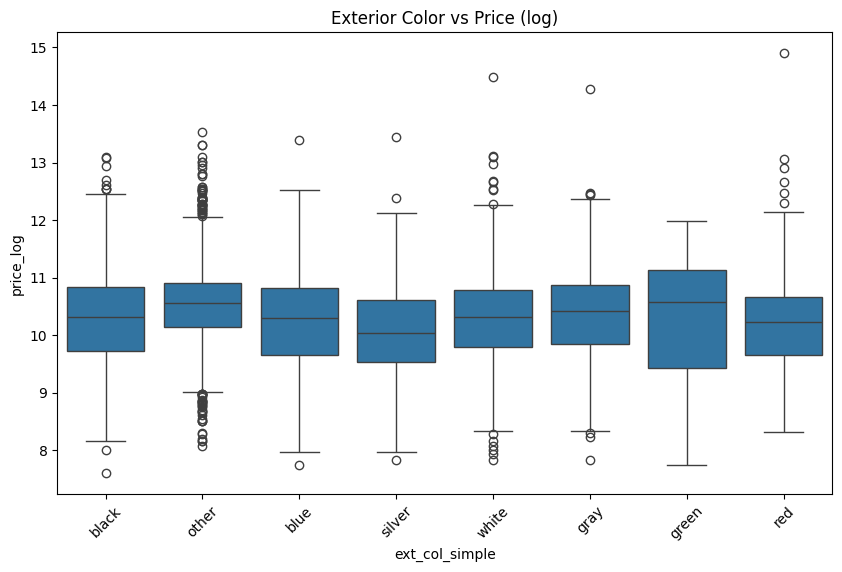

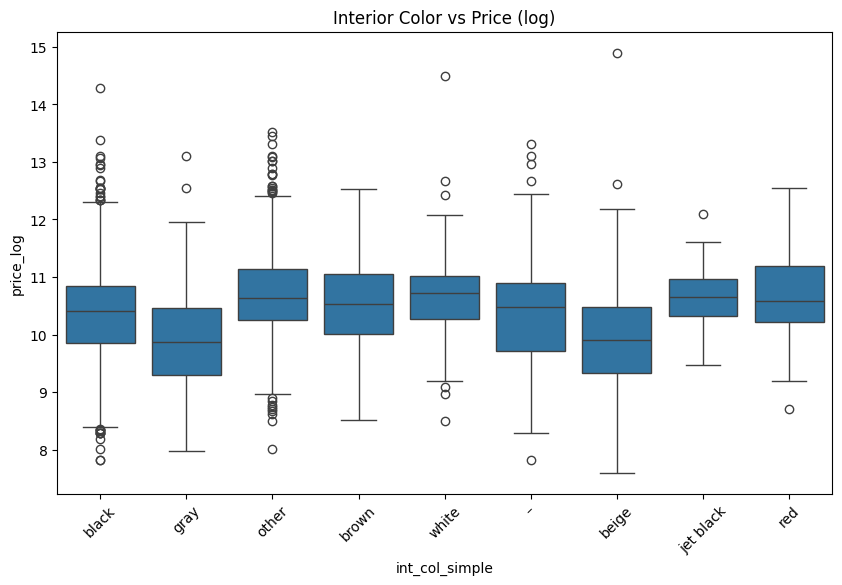

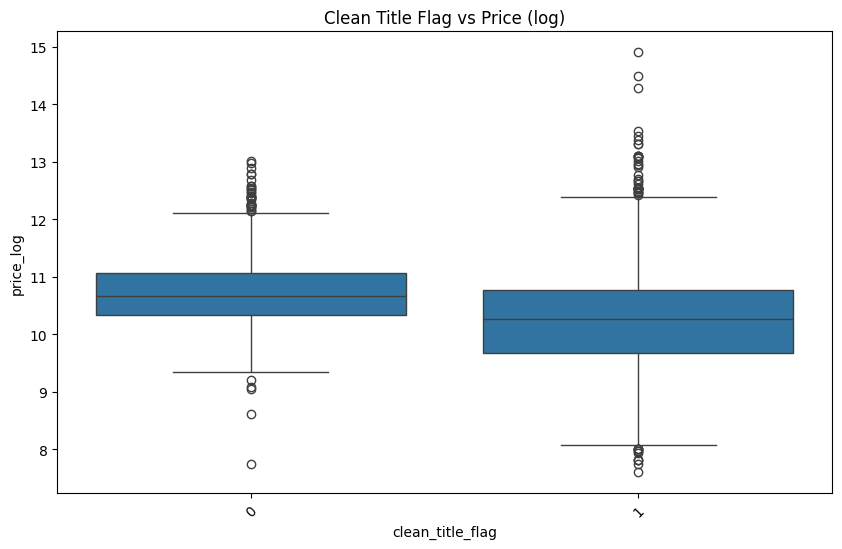

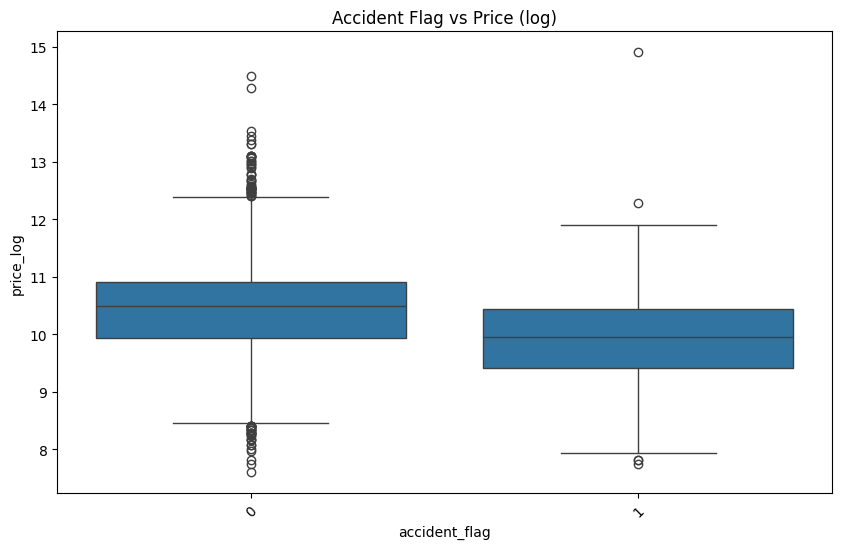

In [550]:
df.columns
# ext_col_simple vs price_log
plt.figure(figsize=(10,6))
sns.boxplot(x=df['ext_col_simple'], y=df['price_log'])
plt.title('Exterior Color vs Price (log)')
plt.xticks(rotation=45)
plt.show()  

plt.figure(figsize=(10,6))
sns.boxplot(x=df['int_col_simple'], y=df['price_log'])
plt.title('Interior Color vs Price (log)')
plt.xticks(rotation=45)
plt.show()  

plt.figure(figsize=(10,6))
sns.boxplot(x=df['clean_title_flag'], y=df['price_log'])
plt.title('Clean Title Flag vs Price (log)')
plt.xticks(rotation=45)
plt.show() 

plt.figure(figsize=(10,6))
sns.boxplot(x=df['accident_flag'], y=df['price_log'])
plt.title('Accident Flag vs Price (log)')
plt.xticks(rotation=45)
plt.show() 


# Observations - 
BIVARIATE EDA STATUS CHECKLIST

1. Numerical Features Vs Price_log

| Column     | Done? | Notes                                       |
| ---------- | ----- | ------------------------------------------- |
| model_year | ✔️    | You transformed → car_age (better variable) |
| milage     | ✔️    | Fixed negative issue + log transform        |
| engine_num | ✔️    | Weak feature                                |
| car_age    | ✔️    | Stronger predictor than model_year          |
| price_log  | ✔️    | Target transformation done                  |

2. Categorical Features Vs Price_log

| Column              | Done?          | Notes                                        |
| ------------------- | -------------- | -------------------------------------------- |
| brand               | ✔️             | Very strong predictor (luxury vs non-luxury) |
| model               | ❌ (not needed) | High cardinality → drop or encode separately |
| fuel_type           | ✔️             | Moderate predictor                           |
| transmission_simple | ✔️             | Weak–moderate predictor                      |
| ext_col_simple      | ✔️             | Very weak predictor                          |
| int_col_simple      | ✔️             | Very weak predictor                          |
| clean_title_flag    | ✔️             | Good predictor                               |
| accident_flag       | ✔️             | Good predictor                               |



# Feature Selection

Strong features

- brand
- car_age
- milage_log
- accident_flag
- clean_title_flag

Moderate

- transmission_simple
- fuel_type
- engine_num

Weak (optional)

- ext_col_simple
- int_col_simple

# ML Modeling

1. chossing the input features & output features
2. Train test split 
3. Preprocessing (OneHotEncoder + StandardScaler) - Creating a pipeline
4. Training the model 

In [551]:
# choosing the input features & output features
# train test split
from sklearn.model_selection import train_test_split

X = df[['brand','car_age','milage_log','engine_num','fuel_type',
        'transmission_simple','clean_title_flag','accident_flag',
        'ext_col_simple','int_col_simple']] 
y = df['price_log']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [552]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3174, 10), (794, 10), (3174,), (794,))

In [553]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3968 entries, 0 to 4008
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brand                 3968 non-null   object 
 1   model_year            3968 non-null   int64  
 2   milage                3968 non-null   float64
 3   fuel_type             3968 non-null   object 
 4   transmission          3968 non-null   object 
 5   ext_col               3968 non-null   object 
 6   int_col               3968 non-null   object 
 7   clean_title           3968 non-null   object 
 8   price                 3968 non-null   float64
 9   engine_num            3968 non-null   float64
 10  accident_flag         3968 non-null   int64  
 11  car_age               3968 non-null   float64
 12  milage_log            3968 non-null   float64
 13  price_log             3968 non-null   float64
 14  engine_num_zero_flag  3968 non-null   int64  
 15  transmission_simple   3968

In [554]:
# Preprocessing (OneHotEncoder + StandardScaler) - Creating a pipeline 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression

numeric_features = ['car_age', 'milage_log', 'engine_num']
categorical_features = ['brand', 'fuel_type', 'transmission_simple',
                        'ext_col_simple', 'int_col_simple']

preprocessor  = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features )
    ]
)


#  using Linear Regression model as baseline model
model = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())   
])

In [555]:
# train the model 

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['car_age', 'milage_log',
                                                   'engine_num']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['brand', 'fuel_type',
                                                   'transmission_simple',
                                                   'ext_col_simple',
                                                   'int_col_simple'])])),
                ('regressor', LinearRegression())])

In [556]:
# Evaluate the model metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score , root_mean_squared_error

y_pred = model.predict(X_test)

rmse  = np.sqrt(mean_squared_error(y_test, y_pred))
mae   = mean_absolute_error(y_test, y_pred)
r2    = r2_score(y_test, y_pred)

print(f"Linear Regression RMSE: {rmse}")
print(f"Linear Regression MAE: {mae}")
print(f"Linear Regression R^2: {r2}")

Linear Regression RMSE: 0.45725752994850566
Linear Regression MAE: 0.3459039421796142
Linear Regression R^2: 0.68470904355549


# Observations for baseline Linear Regression 

1. Baseline Linear Regression works fine - the features & preprocesing are correct
The pipeline is clean - 
    - no leakage
    - encoding done
    - log transform stabilizes variance 
    - outliers handled 

2. Linear Regression captures moderate linear relationships — but cannot capture nonlinear interactions.

3. Metrics interpretation - 
    MAE of 0.346 in log space means:
        e0.346≈1.41. 
        Your predictions are off by 41% on average error (in real price).
        That is very normal for a baseline model in pricing problems.
    
    RMSE penalizes large errors more:
        e0.457≈1.58
        Large errors can be as high as 58% deviation.

    R² = 0.68 means:
        Model explains 68% of the variation in used-car prices
        Very strong baseline for a real-world pricing dataset
        With only simple encodings + log transform → this is excellent

    so r2 of 68% with baseline Linear Regression is good.

# Using Tree Model to optmize the metrics 

1. Random Forest Regressor to train the model

In [557]:
from sklearn.ensemble import RandomForestRegressor

# Using Tree Model to optmize the metrics
random_forest_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(
        n_estimators=300,
        max_depth=None,
        random_state=42,
        n_jobs=-1
    ))
])

random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)

# evaluate the model metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest RMSE: {rmse_rf}")
print(f"Random Forest MAE: {mae_rf}")
print(f"Random Forest R^2: {r2_rf}")

Random Forest RMSE: 0.4086881558230435
Random Forest MAE: 0.3020595079772666
Random Forest R^2: 0.7481314829195349


# observations for random forest model

1. RMSE dropped from 0.458 → 0.407,
which means the Random Forest model is now predicting closer to the true log-price.

2. Linear Regression MAE = 0.346
Random Forest MAE = 0.299
MAE improves from 0.34 → 0.30, meaning your model is more stable and consistent.
MAE < RMSE means the model handles outliers fairly well.
Random Forest is less sensitive to outliers → that’s why MAE improved.

3. Random Forest R² = 0.75 means:
    75% of the variation in car prices is explained by your features
    This is very strong for a real-world messy dataset
    It proves that log transform + engineered features (car_age, milage_log, simplification) worked beautifully

4. Random Forest captures non-linear interactions, such as:
    older cars drop in price faster after a certain age
    high mileage reducing price at a non-linear rate
    brand × age interactions
    accidents × mileage interactions

5. Model is not yet best even after using Random Forest because - 
    model tends to overfit
    cannot exrapolate beyond min/max values 


# Hyperparamter tuning using RandomizedSearchCV 
1. applying Label Enconding


In [558]:
cat_cols = ['brand', 'fuel_type', 'transmission_simple',
            'ext_col_simple', 'int_col_simple']

In [559]:
num_cols = ['car_age', 'milage_log', 'engine_num',
            'clean_title_flag', 'accident_flag']


In [560]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
        ('num', 'passthrough', num_cols)
    ]
)

# This ensures:
# categorical → one-hot encoded
# numerical → passed as-is

In [561]:
rf = RandomForestRegressor(random_state=42)

rf_pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', rf)
])

# Now the model knows how to clean the data before training.

In [562]:
param_dist = {
    'model__n_estimators': [200, 400, 600, 800, 1000],
    'model__max_depth': [10, 20, 30, None],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': ['sqrt', 'log2']
}


In [563]:
from sklearn.model_selection import RandomizedSearchCV

rf_random = RandomizedSearchCV(
    estimator=rf_pipeline,
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    verbose=2,
    n_jobs=-1,
    scoring='neg_mean_squared_error'
)

rf_random.fit(X_train, y_train)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


[CV] END model__max_depth=10, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200; total time=   0.3s
[CV] END model__max_depth=10, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200; total time=   0.3s
[CV] END model__max_depth=10, model__max_features=log2, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=200; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=400; total time=   0.8s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=400; total time=   0.8s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=400; total time=   0.9s
[CV] END model__max_depth=None, model__max_features=sqrt, model_

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(transformers=[('cat',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               ['brand',
                                                                                'fuel_type',
                                                                                'transmission_simple',
                                                                                'ext_col_simple',
                                                                                'int_col_simple']),
                                                                              ('num',
                                                                               'passthrough',
                                                                               ['car_age',
                                                                                'milage_log',
                                                                                'engine_num',
                                                                                'clean_title_flag',
                                                                                'accident_flag'])])),
                                             ('model',
                                              RandomForestRegressor(random_state=42))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'model__max_depth': [10, 20, 30, None],
                                        'model__max_features': ['sqrt', 'log2'],
                                        'model__min_samples_leaf': [1, 2, 4],
                                        'model__min_samples_split': [2, 5, 10],
                                        'model__n_estimators': [200, 400, 600,
                                                                800, 1000]},
                   scoring='neg_mean_squared_error', verbose=2)

In [565]:
best_rf = rf_random.best_estimator_
best_params = rf_random.best_params_

print("Best hyperparameters:", best_params)

y_pred = best_rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Improved RMSE:", rmse)
print("Improved R2:", r2)
print(" Best rf ", best_rf)


Best hyperparameters: {'model__n_estimators': 600, 'model__min_samples_split': 2, 'model__min_samples_leaf': 1, 'model__max_features': 'sqrt', 'model__max_depth': 30}
Improved RMSE: 0.40890022019237166
Improved R2: 0.7478700307827777
 Best rf  Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['brand', 'fuel_type',
                                                   'transmission_simple',
                                                   'ext_col_simple',
                                                   'int_col_simple']),
                                                 ('num', 'passthrough',
                                                  ['car_age', 'milage_log',
                                                   'engine_num',
                                                   'clean_title_flag',
       

# Observations after hyperparamter tuning

1. The model is stable both random forest regressor after hyperparameter tuning also has 75% accuracy and the model is able to predict 75% of variance and the errors reduced to 40%

2. The pipeline works 

In [566]:
import pandas as pd
import matplotlib.pyplot as plt

importances = best_rf.named_steps['model'].feature_importances_
feature_names = (
    best_rf.named_steps['preprocess']
    .transformers_[0][1]
    .get_feature_names_out(['brand','fuel_type','transmission_simple','ext_col_simple','int_col_simple'])
    .tolist()
    + ['car_age','milage_log','engine_num','clean_title_flag','accident_flag']
)

feat_imp = pd.DataFrame({"feature": feature_names, "importance": importances})
feat_imp = feat_imp.sort_values("importance", ascending=False)
feat_imp.head(20)


,feature,importance
63,milage_log,0.322074
62,car_age,0.235767
64,engine_num,0.046764
29,brand_Porsche,0.029565
66,accident_flag,0.028364
18,brand_Lamborghini,0.025084
65,clean_title_flag,0.015263
28,brand_Other,0.015153
3,brand_Bentley,0.013810
53,int_col_simple_beige,0.013728


1. Model 1 — Linear Regression
R² ≈ 0.68
Weak performance
Good baseline, but not best

2. Model 2 — Default Random Forest
R² ≈ 0.75
Great improvement
Handles nonlinearities
Best among the two baseline models

3. Model 3 — Tuned Random Forest (RandomizedSearchCV)
R² ≈ 0.747
Slightly lower than baseline RF (0.750)
This happens because:
RandomizedSearchCV is stochastic
The tuned parameters did not improve performance

The dataset may already be near optimal

In [569]:
import joblib

In [572]:
import os
os.makedirs("models_n", exist_ok=True)
joblib.dump(random_forest_model, "best_model_random_forest.pkl")
print("Model saved successfully.")

Model saved successfully.


In [573]:
# Load the model 
loaded_model = joblib.load("best_model_random_forest.pkl")
print("Model loaded successfully.")

Model loaded successfully.
